# Lending Club Case Study

*Author: Minh Nguyen*

## Loading Dataset and Init Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
# Load dataset from local
df = pd.read_csv("loan.csv")
df.head(10)

/home/minhnguyen14/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Understanding

In [43]:
df.shape

(39717, 111)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [45]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [46]:
# Display the overview of dataset
print(f"Total Rows: {df.shape[0]} records - Total Columns :{df.shape[1]} columns")

Total Rows: 39717 records - Total Columns :111 columns


In [47]:
# Display the overview data type of the dataset
df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [60]:
# Display the object column to check if we can convert them to numeric object
df[list(df.select_dtypes(include=['object']).columns)]

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,initial_list_status,application_type
0,B,B2,NaN,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,f,INDIVIDUAL
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,f,INDIVIDUAL
2,C,C5,NaN,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,IL,f,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,f,INDIVIDUAL
4,B,B5,University Medical Group,1 year,RENT,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,CO,f,INDIVIDUAL
39713,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,NC,f,INDIVIDUAL
39714,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,MA,f,INDIVIDUAL
39715,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,MD,f,INDIVIDUAL


In [59]:
df["term"] = df["term"].apply(lambda x: int(str(x).replace("months", "")))
df["int_rate"] = df["int_rate"].apply(lambda x: float(str(x).replace("%", "")))
df["revol_util"] = df["revol_util"].apply(lambda x: float(str(x).replace("%", "")))
df["zip_code"] = df["zip_code"].apply(lambda x: int(str(x).replace("xx", "")))

df["issue_d"] = pd.to_datetime(df["issue_d"], format = "%b-%y")
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], format = "%b-%y")
df["last_credit_pull_d"] = pd.to_datetime(df["last_credit_pull_d"], format = "%b-%y")
df["next_pymnt_d"] = pd.to_datetime(df["next_pymnt_d"], format = "%b-%y")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format = "%b-%y")

df["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [50]:
# Display the label distribution of dataset
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [61]:
list(df.select_dtypes(include=['object']).columns)

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'application_type']

In [68]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Convert some category to numeric data by using encoder

df["loan_status_embedding"] = label_encoder.fit_transform(df["loan_status"])

df["grade_embedding"] = label_encoder.fit_transform(df["grade"])
df["sub_grade_embedding"] = label_encoder.fit_transform(df["sub_grade"])

df["emp_title_embedding"] = label_encoder.fit_transform(df["emp_title"].astype(str))
df["emp_length_embedding"] = label_encoder.fit_transform(df["emp_length"].astype(str))
df["home_ownership_embedding"] = label_encoder.fit_transform(df["home_ownership"].astype(str))
df["verification_status_embedding"] = label_encoder.fit_transform(df["verification_status"].astype(str))

df["pymnt_plan_embedding"] = label_encoder.fit_transform(df["pymnt_plan"].astype(str))
df["purpose_embedding"] = label_encoder.fit_transform(df["purpose"].astype(str))
df["title_embedding"] = label_encoder.fit_transform(df["title"].astype(str))
df["addr_state_embedding"] = label_encoder.fit_transform(df["addr_state"].astype(str))
df["initial_list_status_embedding"] = label_encoder.fit_transform(df["initial_list_status"].astype(str))
df["application_type_embedding"] = label_encoder.fit_transform(df["application_type"].astype(str))

INDIVIDUAL    39717
Name: application_type, dtype: int64

<AxesSubplot:>

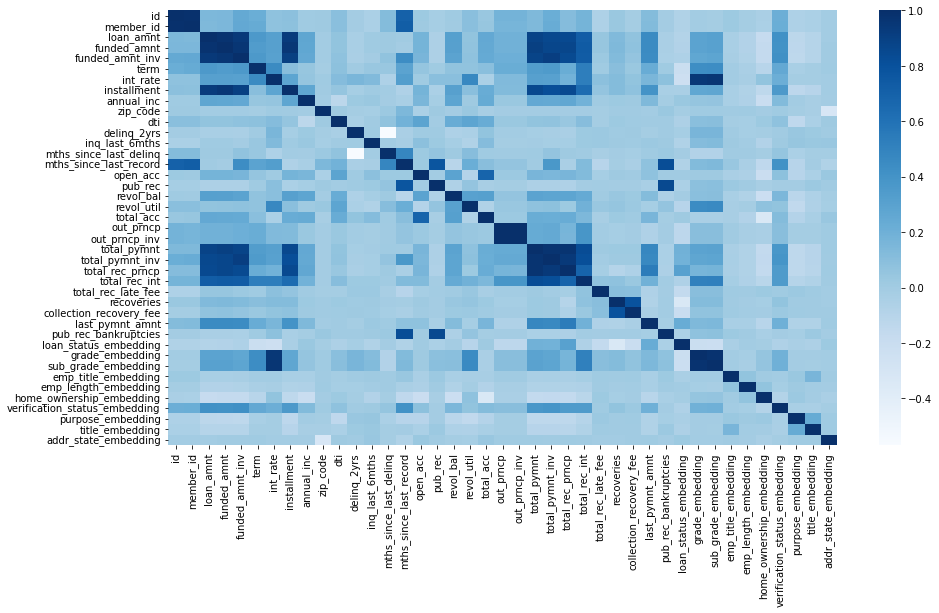

In [69]:
# Quickly check the correlation between the label columns with other columns
import seaborn as sb
from matplotlib import pyplot as plt


plt.figure(figsize=(15,8))
corr = df.corr()
corr = corr.dropna(axis=1, thresh=len(corr)*0.1)
corr = corr.dropna(axis=0, thresh=len(corr.columns)*0.1)
sb.heatmap(corr, cmap="Blues", annot=False)

# corr

In [70]:
# Check the total null rows of the dataset
print(f"Total columns has null values: {len(df.isnull().sum()>0)} cols")

Total columns has null values: 124 cols


## Data Cleaning

<li> Remove rows with null values > 40% </li>
<li> Drop columns that has null value > 40% </li>
<li> Drop columns that only has 1 value </li>

In [71]:
# Remove rows with null values > 40% and drop columns that has null value > 40%
df_filter = df.dropna(axis=1, thresh=len(df)*0.6)
df_filter = df_filter.dropna(axis=0, thresh=len(df_filter.columns)*0.6)
df_filter

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_title_embedding,emp_length_embedding,home_ownership_embedding,verification_status_embedding,pymnt_plan_embedding,purpose_embedding,title_embedding,addr_state_embedding,initial_list_status_embedding,application_type_embedding
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,27432,1,4,2,0,1,2958,3,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,18995,10,4,1,0,0,16197,10,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,27432,1,4,0,0,11,18886,14,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,331,1,4,1,0,9,18779,4,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,23683,0,4,1,0,9,12357,36,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,8353,4,0,0,0,4,7649,5,0,0
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,20696,3,4,0,0,1,13598,27,0,0
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,27432,10,0,0,0,2,9663,19,0,0
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,27432,10,0,0,0,9,8308,20,0,0


In [72]:
cols_remove = []
columns_left = df_filter.columns[df_filter.isnull().sum() > 0]
print(columns_left)
for column in columns_left:
    print("*"*100)
    print(f"Column name: {column}\n")
    print(f"Total Num: {df_filter[column].isnull().sum()} - Ratio: {round(df_filter[column].isnull().sum() * 100/len(df_filter))}%\n")
    print(f"Total Distinct Value: {len(pd.unique(df_filter[column]))}")
    print(df_filter[column].value_counts())
    if len(df_filter[column].value_counts()) == 1:
        cols_remove += [column]
    
# Drop columns that only has 1 value
df_filter = df_filter.drop(columns = cols_remove)

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
****************************************************************************************************
Column name: emp_title

Total Num: 2459 - Ratio: 6%

Total Distinct Value: 28821
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64
***************************************************************************************

In [75]:
df_filter.shape

(39717, 64)

<AxesSubplot:>

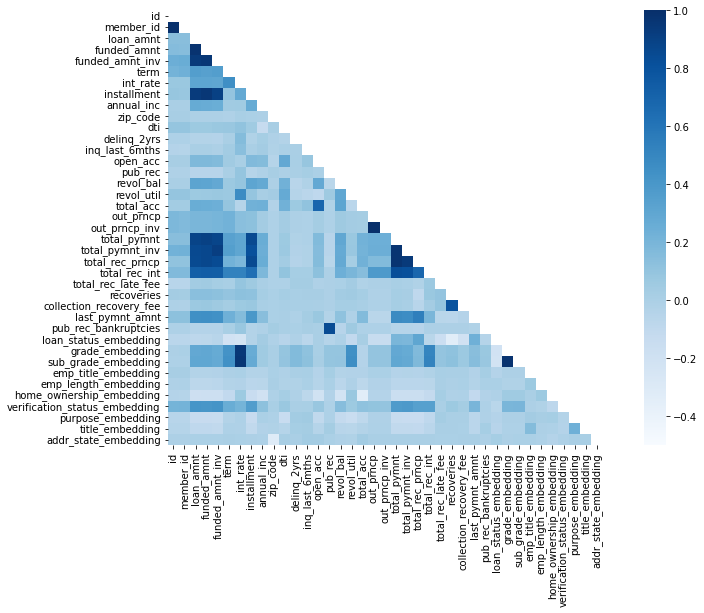

In [101]:
# Quickly check the correlation between the label columns with other columns
import seaborn as sb
from matplotlib import pyplot as plt



plt.figure(figsize=(15,8))
corr = df_filter.corr()

corr = corr.dropna(axis=1, thresh=len(corr)*0.1)
corr = corr.dropna(axis=0, thresh=len(corr.columns)*0.1)

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

sb.heatmap(corr, annot=False, mask=mask,
            fmt='.2f', square=True, cmap="Blues", vmin=-0.5,
    vmax=1)


In [100]:
# Only Focus on the loan status column
df_filter.corrwith(df_filter['loan_status_embedding'])

id                              -0.072152
member_id                       -0.068501
loan_amnt                       -0.079476
funded_amnt                     -0.076350
funded_amnt_inv                 -0.060091
term                            -0.211644
int_rate                        -0.226822
installment                     -0.036132
annual_inc                       0.037053
zip_code                        -0.014862
dti                             -0.049951
delinq_2yrs                     -0.019234
inq_last_6mths                  -0.067612
open_acc                         0.004678
pub_rec                         -0.048212
revol_bal                       -0.011391
revol_util                      -0.101711
total_acc                        0.018919
out_prncp                       -0.133108
out_prncp_inv                   -0.132967
total_pymnt                      0.192413
total_pymnt_inv                  0.187913
total_rec_prncp                  0.302839
total_rec_int                   -0